In [1]:
# imports

import pandas as pd
import numpy as np
import collections
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from nlp.text_statistics import (
    unique_tokens,
    number_tokens,
    tokens_length,
    print_statistics,
    count_numbers,
    number_stopwords,
    count_tokens,
    sort_frequency_tokens)
from nlp.utils import (
    plot_histogram,
    get_completetext,
    plot_wordcloud,
    print_statistics,
    groups_frequency_sort,
    plot_histogram,
    get_completetext,
    get_stopwords)
from utils.read_files import (
    get_items)
from item.item_list import (
    ItemList)

In [2]:
def print_statistics_in_table(numbers):    
    data = {
        'Média': np.mean(numbers),
        'Primeiro quartil': np.percentile(numbers, 25, interpolation='midpoint'),
        'Mediana': np.median(numbers),
        'Terceiro quartil': np.percentile(numbers, 75, interpolation='midpoint'),
        'Desvio Padrão': np.std(numbers),
        'Variância': np.var(numbers),
        'Máximo': np.max(numbers),
        'Mínimo': float(np.min(numbers))
    }
    return pd.DataFrame(data = {"Estatística": list(data.keys()), "Valor": list(data.values())})

# Load dataset

In [3]:
file = '../data/dataset_item_notafiscal.csv'
data = pd.read_csv(file, sep=';')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3679298 entries, 0 to 3679297
Data columns (total 6 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   seq_nota_fiscal          int64  
 1   seq_item_nota            int64  
 2   nom_item                 object 
 3   dsc_unidade_medida       object 
 4   vlr_unitario_homologado  float64
 5   ano_exercicio            int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 168.4+ MB


In [5]:
data.head()

,seq_nota_fiscal,seq_item_nota,nom_item,dsc_unidade_medida,vlr_unitario_homologado,ano_exercicio
0,91611180,38706974,PRESTACAO DE SERVICOS ELETRICOS EM VEICULOS LE...,HRS,63.00,2014
1,91611231,38706975,OLEO DIESEL COMBUSTIVEL S10 2567,LTR,2.71,2014
2,91638555,38706976,G 052737Q9 GRAXA LUBRIF NGL2 2797,UN,30.00,2014
3,91638555,38706977,G 052815Q9 OLEO DIF 85W140 2798,UN,25.00,2014
4,91611257,38706978,PNEU 16570R13 472,UN,180.00,2014


# Load items preprocessed

In [ ]:
# It gets the descriptions processed:
itemlist = ItemList()
itemlist.load_items_from_file('../data/items_preprocessed_complete_druid_v2.csv.zip')

In [ ]:
itemlist.items_df.info()

In [ ]:
itemlist.items_df.head(50)

In [29]:
itemlist.items_df[itemlist.items_df['original_prep'].str.contains("servico")].head(50)

,palavras,unidades_medida,numeros,cores,materiais,tamanho,quantidade,preco,dsc_unidade_medida,original,original_prep,ano,licitacao,licitacao_item,item_id
20,"['servico', 'hospedagem', 'apartamento', 'com'...",[],[],[],[],[],[],40.00,diaria,SERVICO DE HOSPEDAGEM (APARTAMENTO COM TV,"['servico', 'hospedagem', 'apartamento', 'com'...",2015,297146,10002674,20
203,"['servico', 'caster']",[],[],[],[],[],[],36.67,servico,SERVICO DE CASTER::,"['servico', 'caster']",2017,297447,10037683,203
204,"['servico', 'valvula', 'carro', 'gari', 'pneu'...",[],"['3.50e+02', '8.00e+00']",[],['ferro'],[],[],5.00,servico,SERVICO DE VALVULA - CARRINHO DE GARIS E FERRO...,"['servico', 'valvula', 'carro', 'gari', 'ferro...",2017,297447,10037766,204
205,"['servico', 'solda', 'chassi']",[],[],[],[],[],[],15.87,servico,SERVICO DE SOLDA EM CHASSIS,"['servico', 'solda', 'chassi']",2017,297447,10037815,205
229,"['servico', 'montagem', 'pneu']",[],"['1.00e+03', '2.00e+01']",[],[],[],[],30.00,servico,SERVICO MONTAGEM EM PNEU 1000X20,"['servico', 'montagem', 'pneu', '1000', 'x', '...",2017,297542,10042065,229
287,"['servico', 'alinhamento', 'pesado']",[],[],[],[],[],[],130.00,servico,SERVICO DE ALINHAMENTO PESADO,"['servico', 'alinhamento', 'pesado']",2015,298110,10056932,287
349,"['servico', 'manut', 'eletrico', 'fiat']",[],[],[],[],[],[],105.60,hora,SERVICO MANUT. ELETRICA - FIAT,"['servico', 'manut', 'eletrico', 'fiat']",2016,298687,10068002,349
401,"['prestacao', 'servico', 'transporte', 'rodovi...",[],[],[],[],[],[],4.50,km,PRESTACAO DE SERVICOS DE TRANSPORTE RODOVIARIO...,"['prestacao', 'servico', 'transporte', 'rodovi...",2017,299065,10085841,401
459,"['servico', 'transporte', 'escolar', 'rural', ...",[],['4.00e+00'],[],[],[],[],2.69,unidade,SERVICO DE TRANSPORTE ESCOLAR RURAL LINHA 004 ...,"['servico', 'transporte', 'escolar', 'rural', ...",2016,31867,1012551,459
505,"['servico', 'confeccao', 'banner', 'digital', ...",['cm'],"['1.00e+00', '7.00e+01']",['branco'],"['lona', 'madeira']",[],[],24.00,unidade,"SERVICO DE CONFECCAO, BANNER DIGITAL, MEDINDO ...","['servico', 'confeccao', 'banner', 'digital', ...",2014,32029,1018247,505


In [9]:
sample = itemlist.items_df.loc[:, ["original", "original_prep"]].head()
print(list(zip(sample.original.to_list(), sample.original_prep.to_list())))

[('PRESTACAO DE SERVICOS ELETRICOS EM VEICULOS LEVES 2407', "['prestacao', 'servico', 'eletrico', 'veiculo', 'leve', '2407']"), ('OLEO DIESEL COMBUSTIVEL S10 2567', "['oleo', 'diesel', 'combustivel', '10', '2567']"), ('G 052737Q9 GRAXA LUBRIF NGL2 2797', "['g', 'q', '9', 'graxo', 'brif', 'ngl2', '2797']"), ('G 052815Q9 OLEO DIF 85W140 2798', "['g', 'q', '9', 'oleo', 'dif', '85', 'w', '140', '2798']"), ('PNEU 16570R13 472', "['pneu', 'r', '13', '472']")]


## Get preprocessed descriptions

In [22]:
tokenized = list(itemlist.items_df['original_prep'])
original = list(itemlist.items_df['original'])

In [23]:
tokenized = [eval(t) for t in tokenized]
tokenized[:10]

[['encunhamento',
  'aperto',
  'alvenaria',
  'tijolo',
  'ceramico',
  'macico',
  '5',
  'x',
  '10',
  '20',
  'cm',
  '1',
  'vez',
  'esp',
  'assentamento',
  'c',
  'argamassa',
  'traco',
  '1.6',
  'cimento',
  'areia',
  '524'],
 ['piso',
  'cimentado',
  'desempenar',
  'com',
  'acabamento',
  'liso',
  '30',
  'cm',
  'junta',
  'acabado',
  '12',
  'm',
  '1013'],
 ['chuveiro',
  'maxi',
  'ducha',
  'lorenzetticom',
  'mangueira',
  'plastico',
  'desviador',
  'para',
  'ducha',
  'eletrico',
  'codigo',
  '8010',
  'lorenzetti',
  'equivalente',
  '15.12'],
 ['tubo', 'pvc', 'soldavel', '25', 'mm', 'inclusive', 'conexao', '19.1'],
 ['tomado', 'modular', 'rj', '45', 'categoria', '6', 'completo', '2041'],
 ['joelho', '90', 'soldavel', '75', 'mm', 'fornecimento', 'instalacao'],
 ['aditivo', 'para', 'radiador'],
 ['filtro', 'ar', 'primario', 'ars', '1013'],
 ['cone',
  'guta',
  'percha',
  'acessorio',
  'r8',
  'ff',
  'caixa',
  'com',
  '120',
  'unidade',
  'amora'],


In [24]:
len(tokenized)

10901983

In [25]:
token_count = count_tokens(tokenized)

In [26]:
token_name_count = sort_frequency_tokens(token_count)

In [27]:
token_name_count[:100]

[('com', 1582912),
 ('para', 1311597),
 ('x', 1293664),
 ('1', 879487),
 ('mm', 878005),
 ('2', 686512),
 ('cm', 610308),
 ('mg', 579957),
 ('c', 568092),
 ('ml', 555537),
 ('100', 554966),
 ('cor', 501858),
 ('50', 477549),
 ('4', 464275),
 ('10', 454962),
 ('20', 432068),
 ('3', 422569),
 ('5', 397244),
 ('p', 369296),
 ('m', 358925),
 ('g', 355700),
 ('tipo', 345235),
 ('plastico', 324926),
 ('papel', 311700),
 ('12', 305886),
 ('caixa', 305185),
 ('n', 301939),
 ('branco', 288526),
 ('pvc', 282838),
 ('25', 282318),
 ('unidade', 278920),
 ('6', 276303),
 ('embalagem', 274644),
 ('40', 272195),
 ('aco', 271973),
 ('500', 270835),
 ('8', 254307),
 ('tamanho', 253686),
 ('servico', 252451),
 ('30', 247396),
 ('minimo', 234779),
 ('kg', 229671),
 ('cabo', 229135),
 ('litro', 223466),
 ('15', 212224),
 ('sem', 198553),
 ('%', 191068),
 ('ano', 187566),
 ('preto', 185129),
 ('60', 182424),
 ('agua', 180513),
 ('pneu', 179405),
 ('tubo', 177238),
 ('16', 170139),
 ('placa', 167144),
 ('fi

## Check unique tokens

In [14]:
unique = unique_tokens(tokenized)

In [15]:
print(list(unique)[:5])

['metalic', 'longan', 'poliamido', 'polimaltosado', 'crni']


In [16]:
len(unique)

99895

## Documents length

In [17]:
doc_lengths = number_tokens(tokenized)
tok_lengths = tokens_length(tokenized)

In [18]:
tokens_ = []
for doc in tokenized:
    for token in doc:
        tokens_.append(token.lower())

tokens_ = list(set(tokens_))

In [19]:
count = 0
for i in range(1, 21):
    count += doc_lengths.count(i)
    
count

3296832

In [20]:
len(doc_lengths)

3679117

In [21]:
count = 0
for i in range(1, 11):
    count += doc_lengths.count(i)
    
count

2956257

In [22]:
count = 0
for doc in tokenized:
    count += len(doc)

count

30707166

In [23]:
tok_lengths.count(1)

2571288

In [24]:
len(tok_lengths)

30707166

In [25]:
count = 0
for i in range(1, 21):
    count += tok_lengths.count(i)
    
count

30707166

In [26]:
print(tok_lengths.count(1))
print(tok_lengths.count(2))
print(tok_lengths.count(3))

2571288
3094135
3205444


In [27]:
print_statistics_in_table(doc_lengths)

,Estatística,Valor
0,Média,8.346341
1,Primeiro quartil,3.000000
2,Mediana,5.000000
3,Terceiro quartil,8.000000
4,Desvio Padrão,9.884599
5,Variância,97.705296
6,Máximo,144.000000
7,Mínimo,1.000000


In [28]:
print_statistics_in_table(tok_lengths)

,Estatística,Valor
0,Média,5.545138
1,Primeiro quartil,3.000000
2,Mediana,5.000000
3,Terceiro quartil,8.000000
4,Desvio Padrão,3.044352
5,Variância,9.268080
6,Máximo,20.000000
7,Mínimo,1.000000


In [29]:
sum([tok_lengths.count(i) for i in range(1, 8+1)])/len(tok_lengths)
print(", ".join([t for t in unique if len(t) >= 18][:15]))

coloracaoesverdeada, mancal6008001069001, chumbadoresparabout, receptoralimentacao, operacionalwindows, degoloredondovieis, colecalciferol1250, formigaenvernizado, acessibilidadepara, menorsensibilidade, mediantefiscalizacao, imunocromatrografica, alteracaodimensional, multiefeitoditigal0, imunocromatrografico


In [30]:
print_statistics_in_table(tokens_length(tokenized, remove_duplicates=True))

,Estatística,Valor
0,Média,7.703218
1,Primeiro quartil,5.000000
2,Mediana,7.000000
3,Terceiro quartil,10.000000
4,Desvio Padrão,3.596443
5,Variância,12.934404
6,Máximo,20.000000
7,Mínimo,1.000000


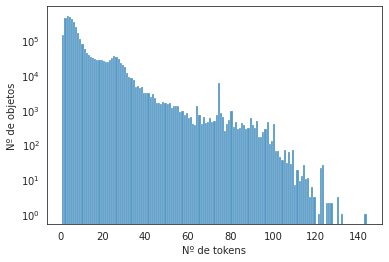

In [111]:
#plot_histogram(doc_lengths, 100, 'Nº de tokens', 'Nº de objetos')
sns.histplot(data=doc_lengths, binwidth=1, log_scale=(False, True))
plt.xlabel('Nº de tokens')
plt.ylabel('Nº de objetos')
plt.show()

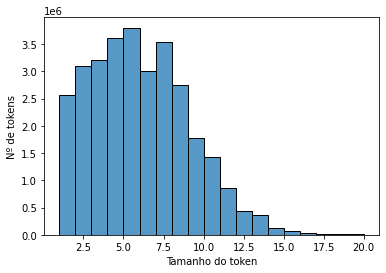

In [36]:
#plot_histogram(tok_lengths, 100, 'Tamanho do token', 'Nº de tokens')
sns.histplot(data=tok_lengths, binwidth=1)
plt.xlabel('Tamanho do token')
plt.ylabel('Nº de tokens')
plt.show()

In [115]:
temp = tokens_length(tokenized, remove_duplicates=True)
sum([temp.count(i) for i in range(4, 11)])/sum(temp)

0.09278465730923324

In [38]:
count = 0
for i in range(100, 200):
    count += temp.count(i)
    
count

0

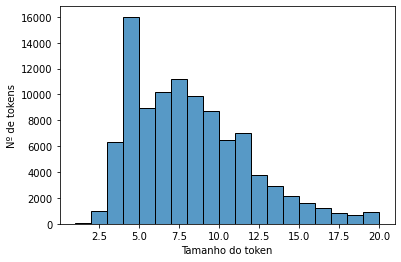

In [40]:
# plot_histogram(tokens_length(tokenized, remove_duplicates=True), 100, 'Tamanho do token', 'Nº de tokens')
unique_tokens = tokens_length(tokenized, remove_duplicates=True)
sns.histplot(data=unique_tokens, binwidth=1)
plt.xlabel('Tamanho do token')
plt.ylabel('Nº de tokens')
plt.show()

## Count numbers

In [47]:
num_numbers = count_numbers(tokenized)

In [48]:
len(num_numbers)

3679117

In [49]:
print_statistics_in_table(num_numbers)

,Estatística,Valor
0,Média,1.203195
1,Primeiro quartil,0.000000
2,Mediana,1.000000
3,Terceiro quartil,2.000000
4,Desvio Padrão,1.498071
5,Variância,2.244216
6,Máximo,38.000000
7,Mínimo,0.000000


In [50]:
count = 0

for nums in num_numbers:
    count += nums

count

4426694

In [121]:
count = 0

for i in range(0, 1):
    count += num_numbers.count(i)
    
count/sum(num_numbers)

0.3054776318399239

In [52]:
for doc in tokenized:
    count = 0
    for token in doc:
        if token.isnumeric():
            count += 1
    if count == 38:
        print(" ".join(doc))

kit psicomotricidade mobilidade infantil confeccionado madeira eva contender 64 peca ser 8 forma geometrico 2 triangulo medir 250 x 290 mm retangulo 350 220 circulo diametro quadrado 320 4 triangulo 480 506 quadrado 460 octogono 505 515 retangulo 455 360 suporte 205 34 15 12 mao 160 130 cada pe 190 85 pau corda 135 95 35 polir corda com cabo 2200 decomprimento 1 gangorra amadeirar 200 cilindro 60 prancha equilibrio 585 kricts 340 210 para 345 70 3 martelo 80 bola borracha
kit psicomotricidade mobilidade infantil confeccionado madeira eva contender 64 peca ser 8 forma geometrico 2 triangulo medir 250 x 290 mm retangulo 350 220 circulo diametro quadrado 320 4 triangulo 480 506 quadrado 460 octogono 505 515 retangulo 455 360 suporte 205 34 15 12 mao 160 130 cada pe 190 85 pau corda 135 95 35 polir corda com cabo 2200 decomprimento 1 gangorra 200 cilindro 60 prancha equilibrio 585 kricts 340 210 para 345 70 3 martelo 80 bola borracha d


In [53]:
print_statistics_in_table(num_numbers)

,Estatística,Valor
0,Média,1.203195
1,Primeiro quartil,0.000000
2,Mediana,1.000000
3,Terceiro quartil,2.000000
4,Desvio Padrão,1.498071
5,Variância,2.244216
6,Máximo,38.000000
7,Mínimo,0.000000


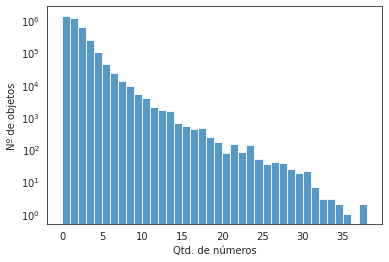

In [118]:
# plot_histogram(num_numbers, 30, 'Qtd. de números', 'Nº de objetos')
sns.histplot(data=num_numbers, binwidth=1, log_scale=(False, True))
plt.xlabel('Qtd. de números')
plt.ylabel('Nº de objetos')
plt.show()

In [30]:
complete_text = get_completetext(tokenized)
len(complete_text)

529018093

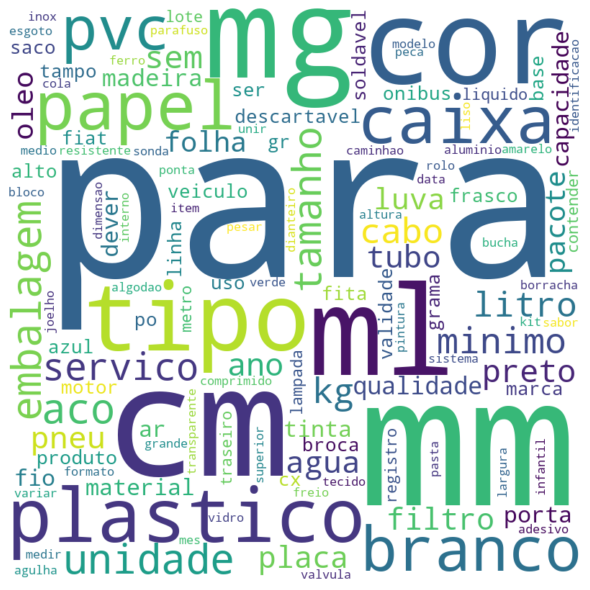

<Figure size 432x288 with 0 Axes>

In [31]:
plot_wordcloud(complete_text)

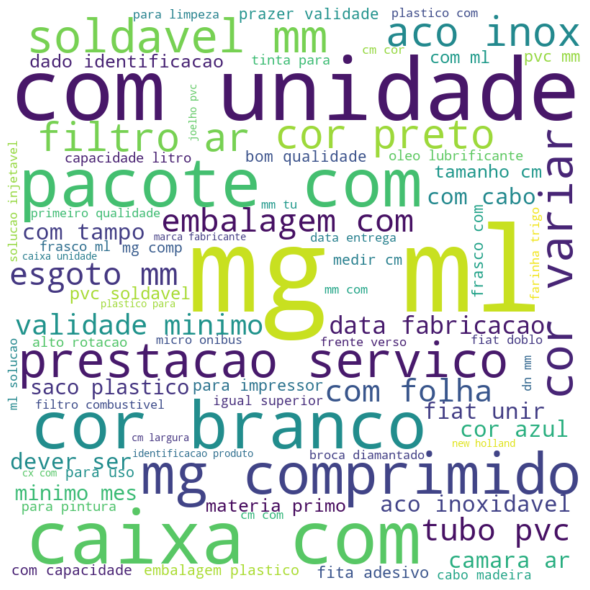

<Figure size 432x288 with 0 Axes>

In [32]:
plot_wordcloud(complete_text, collocations=True)

## Count stopwords

In [76]:
stopwords = get_stopwords()[0]

In [77]:
stopwords

{'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'ate',
 'até',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'era',
 'eram',
 'eramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estao',
 'estas',
 'estava',
 'estavam',
 'estavamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiveramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivessemos',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'foramos',
 'formos',
 'fossemos',
 'fui',
 'fôramos',
 'fôssemos',
 'ha',
 'hajamos',
 'hao',
 'havemos',
 'hei',
 'houve',
 'houvemos',
 'houvera',
 'houveram',
 'houveramos',
 'houverao',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'h

In [122]:
len(stopwords)

207

In [125]:
num_stopwords = number_stopwords(original, stopwords)

In [124]:
num_stopwords.count(0)

146257736

In [80]:
len(num_stopwords)

3679117

In [81]:
count = 0
for i in range(0, 4):
    count += num_stopwords.count(i)
    
count

3679117

In [82]:
count = 0
for i in range(10, 200):
    count += num_stopwords.count(i)
    
count

0

In [83]:
print_statistics(num_stopwords)

Mean: 0.022313234398362435
First quartile: 0.0
Median: 0.0
Third quartile: 0.0
Std: 0.15342115216340915
Var: 0.02353804993114795
Max: 3
Min: 0.0


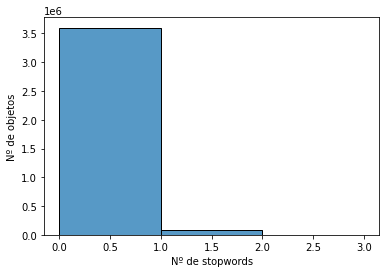

In [84]:
#plot_histogram(num_stopwords, 40, 'Nº de stopwords', 'Nº de objetos', 'number_stopwords.png')
sns.histplot(data=num_stopwords, binwidth=1)
plt.xlabel('Nº de stopwords')
plt.ylabel('Nº de objetos')
plt.show()

## Prices

In [87]:
item_price = data[['nom_item', 'vlr_unitario_homologado']].values.tolist()

In [132]:
data[['nom_item', 'vlr_unitario_homologado']].head()

,nom_item,vlr_unitario_homologado
0,PRESTACAO DE SERVICOS ELETRICOS EM VEICULOS LE...,63.00
1,OLEO DIESEL COMBUSTIVEL S10 2567,2.71
2,G 052737Q9 GRAXA LUBRIF NGL2 2797,30.00
3,G 052815Q9 OLEO DIF 85W140 2798,25.00
4,PNEU 16570R13 472,180.00


In [133]:
len(item_price)

3679298

In [88]:
unique_items = collections.defaultdict(list)

for item, vlr in item_price:
    unique_items[item].append(vlr)
    

In [89]:
len(unique_items)

709661

In [90]:
prices = []

for item, item_list in unique_items.items():
    if np.mean(item_list) != 0:
        prices.append(np.mean(item_list))

In [138]:
count = 0

for item, price in item_price:
    if price <= 1000:
        #print(item, price)
        count += 1
        
100 *count/len(item_price)

95.880110825489

In [92]:
item_distinct = data.drop_duplicates(['nom_item'])

In [94]:
item_distinct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 709661 entries, 0 to 3679295
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   seq_nota_fiscal          709661 non-null  int64  
 1   seq_item_nota            709661 non-null  int64  
 2   nom_item                 709660 non-null  object 
 3   dsc_unidade_medida       709643 non-null  object 
 4   vlr_unitario_homologado  709661 non-null  float64
 5   ano_exercicio            709661 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 37.9+ MB


In [95]:
prices = list(item_distinct['vlr_unitario_homologado'])

In [96]:
prices[:10]

[63.0, 2.71, 30.0, 25.0, 180.0, 3.15, 15.5, 15.5, 4.3, 45.0]

In [97]:
len(prices)

709661

In [98]:
prices.count(0.0)

2

In [99]:
while prices.count(0.0) != 0:
    prices.remove(0.0)

prices.count(0.0)

0

In [100]:
print_statistics(prices)

Mean: 958.0477203593558
First quartile: 5.0
Median: 22.9
Third quartile: 110.0
Std: 18979.954975685676
Var: 360238690.87905544
Max: 3792955.63
Min: 0.001


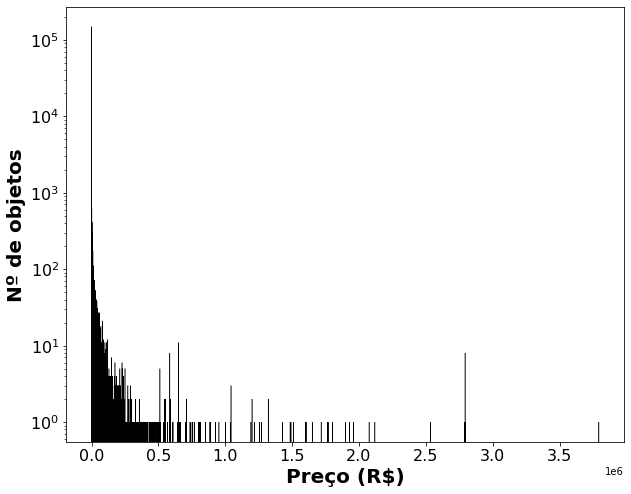

<Figure size 432x288 with 0 Axes>

In [101]:
plot_histogram(prices, 1000000, 'Preço (R$)', 'Nº de objetos',  log=True, histtype='step')

In [102]:
count_interval = {}
count_interval['(0,1]'] = 0
count_interval['(1,5]'] = 0
count_interval['(5,10]'] = 0
count_interval['(10,100]'] = 0
count_interval['(100,1000]'] = 0
count_interval['(1000,10000]'] = 0
count_interval['(10000,100000]'] = 0
count_interval['>100000'] = 0

In [103]:
for p in prices:
    
    if p <= 1.00:
        count_interval['(0,1]'] += 1
    elif p > 1.00 and p <= 5:
        count_interval['(1,5]'] += 1
    elif p > 5.00 and p <= 10.00:
        count_interval['(5,10]'] += 1
    elif p > 10.00 and p <= 100.00:
        count_interval['(10,100]'] += 1
    elif p > 100.00 and p <= 1000.00:
        count_interval['(100,1000]'] += 1
    elif p > 1000.00 and p <= 10000.00:
        count_interval['(1000,10000]'] += 1
    elif p > 10000.00 and p <= 100000.00:
        count_interval['(10000,100000]'] += 1
    else:
        count_interval['>100000'] += 1

In [104]:
total = 0
lines = []
aux = 0
for interval, value in count_interval.items():
    print(interval, ':', value)
    for i in range(0, value):
        lines.append([interval])
        aux += 1
    total += value

(0,1] : 54296
(1,5] : 126792
(5,10] : 75767
(10,100] : 268063
(100,1000] : 141608
(1000,10000] : 35410
(10000,100000] : 6667
>100000 : 1056


In [105]:
aux

709659

In [106]:
intervals_df = pd.DataFrame(lines, columns=["Preço"])
intervals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709659 entries, 0 to 709658
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Preço   709659 non-null  object
dtypes: object(1)
memory usage: 5.4+ MB


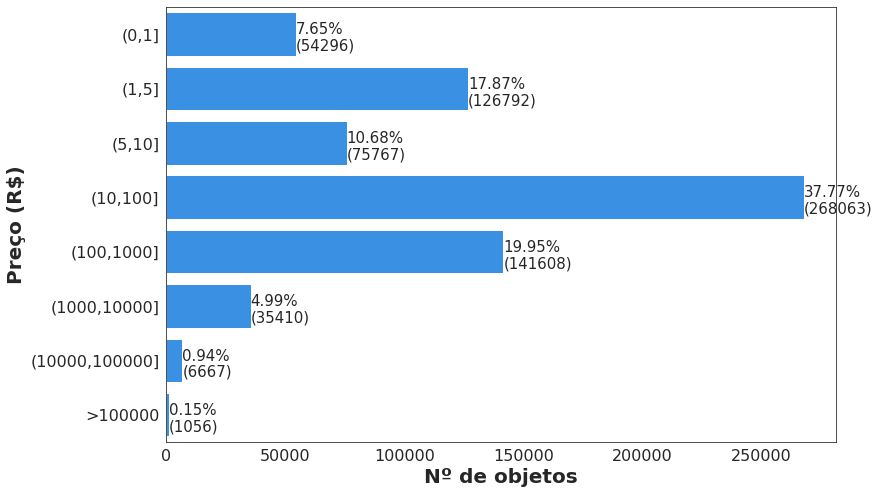

<Figure size 432x288 with 0 Axes>

In [107]:
import seaborn as sns
sns.set_style("white")

fig, (axis1) = plt.subplots(figsize=(12,8))

sns.countplot(y="Preço", data=intervals_df, color='dodgerblue')

axis1.set_xlabel("Nº de objetos", fontsize=20, weight='bold')
axis1.set_ylabel("Preço (R$)", fontsize=20, weight='bold')
plt.grid(False)

total = len(intervals_df)
for p in axis1.patches:
    width = p.get_width()
    axis1.text(width, p.get_y()+0.7, '(%d)'%(width), fontsize=15)
    axis1.text(width, p.get_y()+0.4, '%.2f%%'%(100*float(width)/total), fontsize=15)

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

plt.show()
plt.clf()